In [1]:
import sys
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot4/lib/python3.7/site-packages')
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages')
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages')
print ( sys.path )

import numpy as np
import pandas as pd
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
from joblib import dump, load
# plt.style.use(mplhep.style.CMS)
import matplotlib.font_manager
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 18,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )
# mpl.rcParams.update(
#     {'font.size': 18,
#      'font.family': 'sans-serif',
#      'font.sans-serif': ['Helvetica'],
#      'legend.fontsize': 14,
#      'axes.labelsize': 18,
#      'xtick.labelsize': 14,
#      'ytick.labelsize': 14
#     }
#     )
# mpl.rcParams

['/cvmfs/sft.cern.ch/lcg/releases/condor/8.9.11-e1651/x86_64-centos7-gcc11-opt/lib/python3', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/itk', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/python', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib', '', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python39.zip', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.9', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.9/lib-dynload', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/IPython/extensions', '/scratch/malvesga/.ipyth

In [2]:
from processing import lumi_periods_2017, lumi_periods_2018

#lepton_type = 'muon'
lepton_type = 'electron'

# data_sample = '2017'
data_sample = '2018'

save_figures = True

{'muon': {'2017B': 4.799881474, '2017C1': 5.785813941, '2017C2': 3.786684323, '2017D': 4.247682053, '2017E': 9.312832062, '2017F1': 1.738905587, '2017F2': 8.125575961, '2017F3': 3.674404546}, 'electron': {'2017B': 4.594096155565198, '2017C1': 5.521298099245362, '2017C2': 3.6135646891210857, '2017D': 4.0518639103567, '2017E': 8.906848461089172, '2017F1': 1.6584516422062712, '2017F2': 7.749629938012412, '2017F3': 3.504400870870218}}
Luminosity 2017 muon: 41.471779946999995
Luminosity 2017 electron: 39.60015376646642
{'muon': {'2018A': 14.025827145867588, '2018B1': 6.620869367493728, '2018B2': 0.430376623828928, '2018C': 6.891684998276784, '2018D1': 20.939902986506983, '2018D2': 10.856932131702669}, 'electron': {'2018A': 13.088399561509418, '2018B1': 6.629521091507798, '2018B2': 0.430939012174748, '2018C': 6.8915954055654725, '2018D1': 20.94983928140255, '2018D2': 10.862083907209522}}
Luminosity 2018 muon: 59.76559325367668
Luminosity 2018 electron: 58.85237825936951


### Event selection

In [3]:
def select_events( df_events, lepton_type, max_num_tracks = -1, label_jet=None, label_muon=None, label_electron=None ):

    max_num_tracks_ = max_num_tracks
    
#     label_jet_ = "_nom"
#     label_muon_ = "_nom"
#     label_WLep_ = "_nom"
#     label_WW_ = "_nom"
    label_jet_ = "_nom"
    if label_jet is not None: label_jet_ = label_jet
        
    label_muon_ = "_nom"
    if label_muon is not None: label_muon_ = label_muon
        
    label_electron_ = "_nom"
    if label_electron is not None: label_electron_ = label_electron
        
    label_WLep_ = "_nom"
    if label_muon is not None:
        label_WLep_ = label_muon
    elif label_electron is not None:
        label_WLep_ = label_electron
        
    label_WW_ = "_nom"
    if label_jet is not None:
        label_WW_ = label_jet
    elif label_muon is not None:
        label_WW_ = label_muon
    elif label_electron is not None:
        label_WW_ = label_electron
        
    label_xiCMS_ = "_nom"
    if label_jet is not None:
        label_xiCMS_ = label_jet
    elif label_muon is not None:
        label_xiCMS_ = label_muon
    elif label_electron is not None:
        label_xiCMS_ = label_electron
    
    lepton_var_pt_ = ""
    lepton_var_phi_ = ""
    lepton_var_eta_ = ""
    if lepton_type == 'muon':
        lepton_var_pt_ = "muon0_pt"
        lepton_var_phi_ = "muon0_phi"
        lepton_var_eta_ = "muon0_eta"
    elif lepton_type == 'electron':
        lepton_var_pt_ = "electron0_pt"
        lepton_var_phi_ = "electron0_phi"
        lepton_var_eta_ = "electron0_eta"
        
    deltaPhi_jet_lep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, lepton_var_phi_ ] )
    msk_dphi_ = ( deltaPhi_jet_lep_ < -np.pi )
    deltaPhi_jet_lep_.loc[ msk_dphi_ ] = deltaPhi_jet_lep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_lep_ >= np.pi )
    deltaPhi_jet_lep_.loc[ msk_dphi_ ] = deltaPhi_jet_lep_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaEta_jet_lep_ = ( df_events.loc[ :, "jet0_eta"] - df_events.loc[ :, lepton_var_eta_ ] )
    deltaR_jet_lep_ = np.sqrt( ( deltaPhi_jet_lep_ ) ** 2 + ( deltaEta_jet_lep_ ) ** 2 )
    
    deltaPhi_jet_met_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "met_phi"] )
    msk_dphi_ = ( deltaPhi_jet_met_ < -np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_met_ >= np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaPhi_jet_Wlep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "WLeptonicPhi"] )
    msk_dphi_ = ( deltaPhi_jet_Wlep_ < -np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_Wlep_ >= np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] - 2*np.pi

    ##jet0_tau21_ = ( df_events.loc[ :, "jet0_tau2"] / df_events.loc[ :, "jet0_tau1"] )

    msk_All_ = np.full( df_events.shape[0], True, dtype=bool )
    
    msk_lep_ = None
    if lepton_type == 'muon':
        msk_lep_ = ( ( df_events.loc[ :, "muon0_pt" + label_muon_ ] >= 50.0 ) &
                     ( np.abs( df_events.loc[ :, "muon0_eta"] ) <= 2.4 ) & 
                     ( df_events.loc[ :, "muon0_iso"] <= 0.10 ) )
    elif lepton_type == 'electron':
        msk_lep_ = ( ( df_events.loc[ :, "electron0_pt" + label_electron_ ] >= 50.0 ) &
                     ( np.abs( df_events.loc[ :, "electron0_eta"] ) <= 2.4 ) )
        
    msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 220.0 ) &
                 ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    
    ##msk_jet_lep_ = ( deltaR_jet_lep_ >= np.pi/2 )
    
    ##msk_met_ = ( df_events.loc[ :, "met"] >= 40.0 )
    
    ##msk_jet_met_ = ( np.abs( deltaPhi_jet_met_ ) >= 2.0 )
    
    ##msk_pruned_mass_ = ( ( df_events.loc[ :, "jet0_corrmass" + label_jet_] >= 50.0 ) &
    ##                     ( df_events.loc[ :, "jet0_corrmass" + label_jet_] <= 110.0 ) )
    
    ##msk_tau21_       = ( jet0_tau21_ <= 0.41 )
    
    ##msk_bjet_veto_   = ( df_events.loc[ :, "num_bjets_ak4"] == 0 )
    
#     msk_xiCMS_ = msk_All_.copy()
    ##msk_xiCMS_       = ( ( df_events.loc[ :, "xiCMS_45" + label_xiCMS_ ] <= 0.20 ) & ( df_events.loc[ :, "xiCMS_56" + label_xiCMS_ ] <= 0.20 ) )
    
    ##msk_Wlep_ = ( df_events.loc[ :, "WLeptonicPt" + label_WLep_ ] >= 200.0 )
    
    ##msk_jet_Wlep_ = ( np.abs( deltaPhi_jet_Wlep_ ) >= 2.5 )
    
#     msk_MWW_ = ( df_events.loc[ :, "recoMWW"] >= 500.0 )
    ##msk_MWW_ = ( df_events.loc[ :, "MWW" + label_WW_ ] >= 500.0 )

#     msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= 999 )    
    ##msk_extra_tracks_ = None
    ##if max_num_tracks_ >= 0:
    ##    msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= max_num_tracks_ )
    ##else:
    ##    msk_extra_tracks_ = np.full( df_events.shape[0], True, dtype=bool )
    
    ##masks_ = [ msk_All_, msk_lep_, msk_jet_, msk_jet_lep_, msk_met_, msk_jet_met_,
    ##           msk_pruned_mass_, msk_tau21_, msk_bjet_veto_, msk_xiCMS_,
    ##           msk_Wlep_, msk_jet_Wlep_, msk_MWW_, msk_extra_tracks_ ]
    masks_ = [ msk_All_, msk_lep_, msk_jet_ ]
    
    lepton_sel_name_ = ""
    jet_lepton_sel_name_ = ""
    if lepton_type == 'muon':
        lepton_sel_name_ = "Muon"
        jet_lepton_sel_name_ = "Jet_Muon"
    elif lepton_type == 'electron':
        lepton_sel_name_ = "Electron"
        jet_lepton_sel_name_ = "Jet_Electron"
        
    ##selection_keys_ = [ "All", lepton_sel_name_, "Jet", jet_lepton_sel_name_, "MET", "Jet_MET",
    ##                    "PrunedMass", "Tau21", "BJet_Veto", "Xi_CMS",
    ##                   "WLeptonic", "Jet_WLeptonic", "MWW", "ExtraTracks" ]
    selection_keys_ = [ "All", lepton_sel_name_, "Jet" ]
    
    selections_ = {}
    msk_ = masks_[ 0 ].copy()
    for idx_, key_ in enumerate( selection_keys_ ):
        msk_ = msk_ & masks_[ idx_ ]
        selections_[ key_ ] = np.sum( msk_ )
        
    df_events = df_events.loc[ msk_ ]
    
    return df_events, selection_keys_, selections_

### MC (Bkg)

In [4]:
load_MC = True

labels_MC = []
if data_sample == '2017':
    if lepton_type == 'muon':
        labels_MC = [ ]
    elif lepton_type == 'electron':
        labels_MC = [ ]
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_MC = [ "Bkg-2018-muon-TTJets",
                      "Bkg-2018-muon-WJetsToLNu_0J", "Bkg-2018-muon-WJetsToLNu_1J", "Bkg-2018-muon-WJetsToLNu_2J",
                      "Bkg-2018-muon-DYJetsToLL_0J", "Bkg-2018-muon-DYJetsToLL_1J", "Bkg-2018-muon-DYJetsToLL_2J",
                      "Bkg-2018-muon-QCD_Pt_170to300", "Bkg-2018-muon-QCD_Pt_300to470", "Bkg-2018-muon-QCD_Pt_470to600",
                      "Bkg-2018-muon-QCD_Pt_600to800","Bkg-2018-muon-QCD_Pt_800to1000", "Bkg-2018-muon-QCD_Pt_1000to1400",
                      "Bkg-2018-muon-QCD_Pt_1400to1800", "Bkg-2018-muon-QCD_Pt_1800to2400", "Bkg-2018-muon-QCD_Pt_2400to3200", "Bkg-2018-muon-QCD_Pt_3200toInf",
                      "Bkg-2018-muon-ST_s-channel_4f_leptonDecays", "Bkg-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays",
                      "Bkg-2018-muon-ST_t-channel_top_4f_InclusiveDecays","Bkg-2018-muon-ST_tW_antitop_5f_inclusiveDecays", "Bkg-2018-muon-ST_tW_top_5f_inclusiveDecays",
                      "Bkg-2018-muon-WW",
                      "Bkg-2018-muon-WZ",
                      "Bkg-2018-muon-ZZ"
                    ]
    elif lepton_type == 'electron':
        labels_MC = [ "Bkg-2018-electron-TTJets",
                      "Bkg-2018-electron-WJetsToLNu_0J", "Bkg-2018-electron-WJetsToLNu_1J", "Bkg-2018-electron-WJetsToLNu_2J",
                      "Bkg-2018-electron-DYJetsToLL_0J", "Bkg-2018-electron-DYJetsToLL_1J", "Bkg-2018-electron-DYJetsToLL_2J",
                      "Bkg-2018-electron-QCD_Pt_170to300", "Bkg-2018-electron-QCD_Pt_300to470", "Bkg-2018-electron-QCD_Pt_470to600",
                      "Bkg-2018-electron-QCD_Pt_600to800","Bkg-2018-electron-QCD_Pt_800to1000", "Bkg-2018-electron-QCD_Pt_1000to1400",
                      "Bkg-2018-electron-QCD_Pt_1400to1800", "Bkg-2018-electron-QCD_Pt_1800to2400", "Bkg-2018-electron-QCD_Pt_2400to3200", "Bkg-2018-electron-QCD_Pt_3200toInf",
                      "Bkg-2018-electron-ST_s-channel_4f_leptonDecays", "Bkg-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays",
                      "Bkg-2018-electron-ST_t-channel_top_4f_InclusiveDecays","Bkg-2018-electron-ST_tW_antitop_5f_inclusiveDecays", "Bkg-2018-electron-ST_tW_top_5f_inclusiveDecays",
                      "Bkg-2018-electron-WW",
                      "Bkg-2018-electron-WZ",
                      "Bkg-2018-electron-ZZ"
                    ]
    
df_counts_MC = {}
df_events_MC = {}
if load_MC:
    base_path_ = "output_events"
    for label_ in labels_MC:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            df_counts_MC[ label_ ] = store_[ "counts" ]
            print ( df_counts_MC[ label_ ] )
            df_events_MC[ label_ ] = store_[ "events" ]

Bkg-2018-electron-TTJets
['/counts', '/events']
All           3842337
Jet           3842337
Electron      1754968
check_none    1754968
dtype: int64
Bkg-2018-electron-WJetsToLNu_0J
['/counts', '/events']
All           4
Jet           4
Electron      3
check_none    3
dtype: int64
Bkg-2018-electron-WJetsToLNu_1J
['/counts', '/events']
All           108506
Jet           108506
Electron       50245
check_none     50245
dtype: int64
Bkg-2018-electron-WJetsToLNu_2J
['/counts', '/events']
All           13551
Jet           13551
Electron       6345
check_none     6345
dtype: int64
Bkg-2018-electron-DYJetsToLL_0J
['/counts', '/events']
All           275
Jet           275
Electron      177
check_none    177
dtype: int64
Bkg-2018-electron-DYJetsToLL_1J
['/counts', '/events']
All           121850
Jet           121850
Electron       58517
check_none     58517
dtype: int64
Bkg-2018-electron-DYJetsToLL_2J
['/counts', '/events']
All           355205
Jet           355205
Electron      167169
check_non

In [5]:
label_ref_ = ""
if data_sample == '2017':
    if lepton_type == 'muon':
        label_ref_ = ''
    elif lepton_type == 'electron':
        label_ref_ = ''
elif data_sample == '2018':
    if lepton_type == 'muon':
#         label_ref_ = 'Bkg-2018-muon-TTJets'
        label_ref_ = 'Bkg-2018-muon-WJetsToLNu_1J'
    elif lepton_type == 'electron':
#         label_ref_ = 'Bkg-2018-electron-TTJets'
        label_ref_ = 'Bkg-2018-electron-WJetsToLNu_1J'

print ( df_events_MC[ label_ref_ ].columns.values )
df_events_MC[ label_ref_ ]

['run' 'lumiblock' 'event' 'crossingAngle' 'betaStar' 'instLumi' 'jet0_pt'
 'jet0_eta' 'jet0_phi' 'jet0_energy' 'jet0_mass' 'jet0_corrmass'
 'jet0_tau1' 'jet0_tau2' 'jet0_vertexz' 'jet0_px' 'jet0_py' 'jet0_pz'
 'calo_met' 'met' 'met_x' 'met_y' 'met_phi' 'nVertices' 'num_bjets_ak8'
 'num_bjets_ak4' 'num_jets_ak4' 'pfcand_nextracks'
 'pfcand_nextracks_noDRl' 'recoMWhad' 'recoMWlep' 'recoMWW'
 'recoRapidityWW' 'dphiWW' 'WLeptonicPt' 'WLeptonicEta' 'WLeptonicPhi'
 'electron0_pt' 'electron0_eta' 'electron0_phi' 'electron0_energy'
 'electron0_charge' 'electron0_dxy' 'electron0_dz' 'electron0_corr'
 'electron0_ecalTrkEnPostCorr' 'electron0_ecalTrkEnErrPostCorr'
 'electron0_ecalTrkEnPreCorr' 'electron0_energyScaleUp'
 'electron0_energyScaleDown' 'run_mc' 'pileupWeight'
 'mc_pu_trueinteractions' 'mcWeight' 'prefiring_weight'
 'prefiring_weight_up' 'prefiring_weight_down' 'prefiring_weight_ECAL'
 'prefiring_weight_ECAL_up' 'prefiring_weight_ECAL_down'
 'prefiring_weight_Muon' 'prefiring_weight_M

,run,lumiblock,event,crossingAngle,betaStar,instLumi,jet0_pt,jet0_eta,jet0_phi,jet0_energy,...,xiCMS_45_nom,xiCMS_56_nom,xiCMS_45_jes_up,xiCMS_56_jes_up,xiCMS_45_jes_dw,xiCMS_56_jes_dw,xiCMS_45_jer_up,xiCMS_56_jer_up,xiCMS_45_jer_dw,xiCMS_56_jer_dw
0,1,38441,198122688,140.0,0.0,0.0,219.214340,0.987696,-0.305139,339.065796,...,0.056814,0.027397,0.057199,0.027451,0.056428,0.027344,0.056734,0.027386,0.056893,0.027408
1,1,86273,444649088,140.0,0.0,0.0,217.346939,-0.006334,1.587499,223.959991,...,0.053101,0.025368,0.053220,0.025488,0.052982,0.025248,0.053096,0.025363,0.053106,0.025373
2,1,38279,197288192,140.0,0.0,0.0,216.960068,-1.174600,-2.531147,387.843597,...,0.022096,0.076068,0.022146,0.076595,0.022045,0.075542,0.022142,0.076550,0.022050,0.075587
3,1,38279,197288192,140.0,0.0,0.0,321.137024,-0.216276,0.837060,343.779877,...,0.057687,0.046364,0.057805,0.046544,0.057570,0.046183,0.057699,0.046382,0.057676,0.046346
4,1,38280,197290784,140.0,0.0,0.0,215.853928,-1.121731,0.415378,369.217377,...,0.007985,0.162570,0.008037,0.163068,0.007932,0.162072,0.007992,0.162640,0.007977,0.162500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50240,1,134249,691915008,140.0,0.0,0.0,234.366348,0.227971,-0.819733,244.764328,...,0.051684,0.023768,0.051840,0.023867,0.051528,0.023670,0.051698,0.023777,0.051670,0.023759
50241,1,134250,691922624,140.0,0.0,0.0,314.751617,-0.918268,2.832044,459.997498,...,0.015499,0.161781,0.015569,0.162223,0.015429,0.161340,0.015557,0.162145,0.015441,0.161418
50242,1,92760,478081344,140.0,0.0,0.0,229.397766,-0.527408,-2.223164,265.626190,...,0.059949,0.037547,0.060021,0.037755,0.059877,0.037339,0.059988,0.037660,0.059909,0.037433
50243,1,92793,478252608,140.0,0.0,0.0,299.954285,1.258187,-2.723758,572.598022,...,0.236204,0.010166,0.236885,0.010221,0.235523,0.010111,0.237095,0.010238,0.235314,0.010094


In [6]:
labels_samples = {
    "Bkg-2018-muon-TTJets": r"$t \bar{t} + \rm{jets}$",
    "Bkg-2018-electron-TTJets": r"$t \bar{t} + \rm{jets}$",
    "Bkg-2018-muon-WJetsToLNu_0J": r"$W + 0\rm{jet}$",
    "Bkg-2018-electron-WJetsToLNu_0J": r"$W + 0\rm{jet}$",
    "Bkg-2018-muon-WJetsToLNu_1J": r"$W + 1\rm{jet}$",
    "Bkg-2018-electron-WJetsToLNu_1J": r"$W + 1\rm{jet}$",
    "Bkg-2018-muon-WJetsToLNu_2J": r"$W + 2\rm{jets}$",
    "Bkg-2018-electron-WJetsToLNu_2J": r"$W + 2\rm{jets}$",
    "Bkg-2018-muon-WJetsToLNu": r"$W + \rm{jets}$",
    "Bkg-2018-electron-WJetsToLNu": r"$W + \rm{jets}$",
    "Bkg-2018-muon-DYJetsToLL_0J": r"$\rm{DY} + 0\rm{jet}$",
    "Bkg-2018-electron-DYJetsToLL_0J": r"$\rm{DY} + 0\rm{jet}$",
    "Bkg-2018-muon-DYJetsToLL_1J": r"$\rm{DY} + 1\rm{jet}$",
    "Bkg-2018-electron-DYJetsToLL_1J": r"$\rm{DY} + 1\rm{jet}$",
    "Bkg-2018-muon-DYJetsToLL_2J": r"$\rm{DY} + 2\rm{jet}$",
    "Bkg-2018-electron-DYJetsToLL_2J": r"$\rm{DY} + 2\rm{jet}$",
    "Bkg-2018-muon-DYJetsToLL": r"$\rm{DY} + \rm{jets}$",
    "Bkg-2018-electron-DYJetsToLL": r"$\rm{DY} + \rm{jets}$",
    "Bkg-2018-muon-QCD_Pt_170to300": r"QCD $170$--$300\,\rm{GeV}$",
    "Bkg-2018-electron-QCD_Pt_170to300": r"QCD $170$--$300\,\rm{GeV}$",
    "Bkg-2018-muon-QCD_Pt_300to470": r"QCD $300$--$470\,\rm{GeV}$",
    "Bkg-2018-electron-QCD_Pt_300to470": r"QCD $300$--$470\,\rm{GeV}$",
    "Bkg-2018-muon-QCD_Pt_470to600": r"QCD $470$--$600\,\rm{GeV}$",
    "Bkg-2018-electron-QCD_Pt_470to600": r"QCD $470$--$600\,\rm{GeV}$",
    "Bkg-2018-muon-QCD_Pt_600to800": r"QCD $600$--$800\,\rm{GeV}$",
    "Bkg-2018-electron-QCD_Pt_600to800": r"QCD $600$--$800\,\rm{GeV}$",
    "Bkg-2018-muon-QCD_Pt_800to1000": r"QCD $800$--$1000\,\rm{GeV}$",
    "Bkg-2018-electron-QCD_Pt_800to1000": r"QCD $800$--$1000\,\rm{GeV}$",
    "Bkg-2018-muon-QCD_Pt_1000to1400": r"QCD $1000$--$1400\,\rm{GeV}$",
    "Bkg-2018-electron-QCD_Pt_1000to1400": r"QCD $1000$--$1400\,\rm{GeV}$",
    "Bkg-2018-muon-QCD_Pt_1400to1800": r"QCD $1400$--$1800\,\rm{GeV}$",
    "Bkg-2018-electron-QCD_Pt_1400to1800": r"QCD $1400$--$1800\,\rm{GeV}$",
    "Bkg-2018-muon-QCD_Pt_1800to2400": r"QCD $1800$--$2400\,\rm{GeV}$",
    "Bkg-2018-electron-QCD_Pt_1800to2400": r"QCD $1800$--$2400\,\rm{GeV}$",
    "Bkg-2018-muon-QCD_Pt_2400to3200": r"QCD $2400$--$3200\,\rm{GeV}$",
    "Bkg-2018-electron-QCD_Pt_2400to3200": r"QCD $2400$--$3200\,\rm{GeV}$",
    "Bkg-2018-muon-QCD_Pt_3200toInf": r"QCD $3200$--$\,\rm{GeV}$",
    "Bkg-2018-electron-QCD_Pt_3200toInf": r"QCD $3200$--$\,\rm{GeV}$",
    "Bkg-2018-muon-QCD": r"QCD",
    "Bkg-2018-electron-QCD": r"QCD",
    "Bkg-2018-muon-ST_s-channel_4f_leptonDecays": r"single top $s$-channel $4f$",
    "Bkg-2018-electron-ST_s-channel_4f_leptonDecays": r"single top $s$-channel $4f$",
    "Bkg-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays": r"single top $t$-channel $\bar{t}$ $4f$",
    "Bkg-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays": r"single top $t$-channel $\bar{t}$ $4f$",
    "Bkg-2018-muon-ST_t-channel_top_4f_InclusiveDecays": r"single top $t$-channel $t$ $4f$",
    "Bkg-2018-electron-ST_t-channel_top_4f_InclusiveDecays": r"single top $t$-channel $t$ $4f$",
    "Bkg-2018-muon-ST_tW_antitop_5f_inclusiveDecays": r"single top $tW$ $\bar{t}$ $5f$",
    "Bkg-2018-electron-ST_tW_antitop_5f_inclusiveDecays": r"single top $tW$ $\bar{t}$ $5f$",
    "Bkg-2018-muon-ST_tW_top_5f_inclusiveDecays": r"single top $tW$ $t$ $5f$",
    "Bkg-2018-electron-ST_tW_top_5f_inclusiveDecays": r"single top $tW$ $t$ $5f$",
    "Bkg-2018-muon-ST": r"single top",
    "Bkg-2018-electron-ST": r"single top",
    "Bkg-2018-muon-WW": r"$WW$",
    "Bkg-2018-electron-WW": r"$WW$",
    "Bkg-2018-muon-WZ": r"$WZ$",
    "Bkg-2018-electron-WZ": r"$WZ$",
    "Bkg-2018-muon-ZZ": r"$ZZ$",
    "Bkg-2018-electron-ZZ": r"$ZZ$",
    "Bkg-2018-muon-VV": r"$VV$",
    "Bkg-2018-electron-VV": r"$VV$"
}

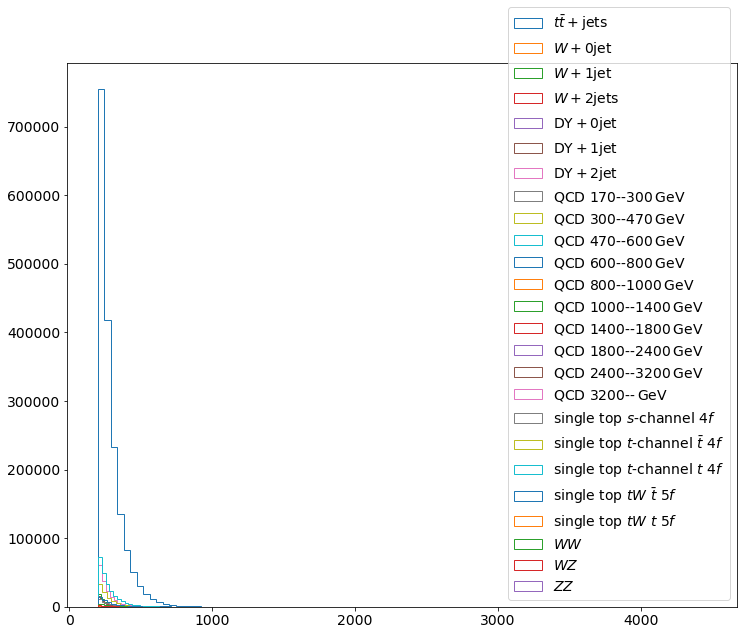

In [7]:
var__ = "jet0_pt_nom"
if load_MC:
    fig = plt.figure( figsize=(12,10) )
    for label__ in labels_MC: 
        plt.hist( df_events_MC[ label__ ][ var__ ], histtype='step', density=False, bins=50, label=labels_samples[ label__ ] )
    plt.legend( loc='best', fontsize=14 )

### Select events

In [8]:
df_selected_events_MC = {}

variations_ = { "jet": [ "_jes_up", "_jes_dw", "_jer_up", "_jer_dw" ] }
for label__ in labels_MC:
    print ( label__ )
    df_events__ = df_events_MC[ label__ ]
    print ( df_events__.shape[0] )
    df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type )
    print ( df_selected_events__.shape[0] )
    print ( selection_keys__ )
    print ( selections__ )
    df_selected_events_MC[ label__ ] = {}
    df_selected_events_MC[ label__ ][ "_nom" ] = df_selected_events__
    for var_label__ in variations_:
        print ( var_label__ )
        for variation__ in variations_[ var_label__ ]:
            opt__ = { "label_" + var_label__ : variation__ }
            print ( opt__ )
            df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type, **opt__ )
            print ( df_selected_events__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
            df_selected_events_MC[ label__ ][ variation__ ] = df_selected_events__

Bkg-2018-electron-TTJets
1754968
1365690
['All', 'Electron', 'Jet']
{'All': 1754968, 'Electron': 1754191, 'Jet': 1365690}
jet
{'label_jet': '_jes_up'}
1409367
['All', 'Electron', 'Jet']
{'All': 1754968, 'Electron': 1754191, 'Jet': 1409367}
{'label_jet': '_jes_dw'}
1323157
['All', 'Electron', 'Jet']
{'All': 1754968, 'Electron': 1754191, 'Jet': 1323157}
{'label_jet': '_jer_up'}
1359252
['All', 'Electron', 'Jet']
{'All': 1754968, 'Electron': 1754191, 'Jet': 1359252}
{'label_jet': '_jer_dw'}
1362036
['All', 'Electron', 'Jet']
{'All': 1754968, 'Electron': 1754191, 'Jet': 1362036}
Bkg-2018-electron-WJetsToLNu_0J
3
2
['All', 'Electron', 'Jet']
{'All': 3, 'Electron': 3, 'Jet': 2}
jet
{'label_jet': '_jes_up'}
2
['All', 'Electron', 'Jet']
{'All': 3, 'Electron': 3, 'Jet': 2}
{'label_jet': '_jes_dw'}
1
['All', 'Electron', 'Jet']
{'All': 3, 'Electron': 3, 'Jet': 1}
{'label_jet': '_jer_up'}
2
['All', 'Electron', 'Jet']
{'All': 3, 'Electron': 3, 'Jet': 2}
{'label_jet': '_jer_dw'}
1
['All', 'Electron'

33290
['All', 'Electron', 'Jet']
{'All': 41010, 'Electron': 41010, 'Jet': 33290}
{'label_jet': '_jes_dw'}
31346
['All', 'Electron', 'Jet']
{'All': 41010, 'Electron': 41010, 'Jet': 31346}
{'label_jet': '_jer_up'}
32211
['All', 'Electron', 'Jet']
{'All': 41010, 'Electron': 41010, 'Jet': 32211}
{'label_jet': '_jer_dw'}
32232
['All', 'Electron', 'Jet']
{'All': 41010, 'Electron': 41010, 'Jet': 32232}
Bkg-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays
90854
67109
['All', 'Electron', 'Jet']
{'All': 90854, 'Electron': 90854, 'Jet': 67109}
jet
{'label_jet': '_jes_up'}
69956
['All', 'Electron', 'Jet']
{'All': 90854, 'Electron': 90854, 'Jet': 69956}
{'label_jet': '_jes_dw'}
64330
['All', 'Electron', 'Jet']
{'All': 90854, 'Electron': 90854, 'Jet': 64330}
{'label_jet': '_jer_up'}
67129
['All', 'Electron', 'Jet']
{'All': 90854, 'Electron': 90854, 'Jet': 67129}
{'label_jet': '_jer_dw'}
66847
['All', 'Electron', 'Jet']
{'All': 90854, 'Electron': 90854, 'Jet': 66847}
Bkg-2018-electron-ST_t-chann

In [9]:
df_selected_events_MC

{'Bkg-2018-electron-TTJets': {'_nom':         run  lumiblock      event  crossingAngle  betaStar  instLumi  \
  1         1        561    1455114          140.0       0.0       0.0   
  2         1        561    1455094          140.0       0.0       0.0   
  3         1        561    1455129          140.0       0.0       0.0   
  4         1        561    1455216          140.0       0.0       0.0   
  6         1        561    1455400          140.0       0.0       0.0   
  ...     ...        ...        ...            ...       ...       ...   
  754963    1     158664  412049184          140.0       0.0       0.0   
  754964    1     158664  412049856          140.0       0.0       0.0   
  754965    1     158664  412049920          140.0       0.0       0.0   
  754966    1     158664  412050272          140.0       0.0       0.0   
  754967    1     158664  412050304          140.0       0.0       0.0   
  
             jet0_pt  jet0_eta  jet0_phi  jet0_energy  ...  xiCMS_45_nom 

In [10]:
import json
samples_info = None
if data_sample == '2017':
    pass
elif data_sample == '2018':
    samples_info = json.load( open( 'samples_info_UL18_XSDB.json' ) )
samples_info

{'FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0': [100000.0, 0.045393, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0': [100000.0, 0.058313, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0': [100000.0, 0.148122, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_2e-5_semi_pt0': [99000.0, 0.16477, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_5e-6_semi_pt0': [100000.0, 0.049199, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_8e-6_semi_pt0': [100000.0, 0.061404, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_0_semi_pt0': [262999.0, 0.0409705, 1.0, 6],
 'TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8': [200205760.0, 831.76, 1.0, 800],
 'WW_TuneCP5_13TeV-pythia8': [6013000.0, 75.95, 1.0, 800],
 'WZ_TuneCP5_13TeV-pythia8': [6017000.0, 27.59, 1.0, 800],
 'ZZ_TuneCP5_13TeV-pythia8': [3000.0, 12.17, 1.0, 800],
 'ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8': [7654000.0,
  3.549,
  1.0,
  800],
 'ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8': [178756000.0,
  115.3,
  1.0,
  800],
 'ST

In [11]:
sample_names = {}
if data_sample == '2017':
    pass
elif data_sample == '2018':
    sample_names[ "Bkg-2018-muon-TTJets" ] = 'TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8'
    sample_names[ "Bkg-2018-muon-WJetsToLNu_0J" ] = 'WJetsToLNu_0J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
    sample_names[ "Bkg-2018-muon-WJetsToLNu_1J" ] = 'WJetsToLNu_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
    sample_names[ "Bkg-2018-muon-WJetsToLNu_2J" ] = 'WJetsToLNu_2J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
    sample_names[ "Bkg-2018-muon-WW" ] = 'WW_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-muon-WZ" ] = 'WZ_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-muon-ZZ" ] = 'ZZ_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-muon-ST_s-channel_4f_leptonDecays" ] = 'ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8'
    sample_names[ "Bkg-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays" ] = 'ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8'
    sample_names[ "Bkg-2018-muon-ST_t-channel_top_4f_InclusiveDecays" ] = 'ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8'
    sample_names[ "Bkg-2018-muon-ST_tW_antitop_5f_inclusiveDecays" ] = 'ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8'
    sample_names[ "Bkg-2018-muon-ST_tW_top_5f_inclusiveDecays" ] = 'ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8'
    sample_names[ "Bkg-2018-muon-DYJetsToLL_0J" ] = 'DYJetsToLL_0J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
    sample_names[ "Bkg-2018-muon-DYJetsToLL_1J" ] = 'DYJetsToLL_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
    sample_names[ "Bkg-2018-muon-DYJetsToLL_2J" ] = 'DYJetsToLL_2J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
    sample_names[ "Bkg-2018-muon-QCD_Pt_170to300" ] = 'QCD_Pt_170to300_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-muon-QCD_Pt_300to470" ] = 'QCD_Pt_300to470_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-muon-QCD_Pt_470to600" ] = 'QCD_Pt_470to600_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-muon-QCD_Pt_600to800" ] = 'QCD_Pt_600to800_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-muon-QCD_Pt_800to1000" ] = 'QCD_Pt_800to1000_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-muon-QCD_Pt_1000to1400" ] = 'QCD_Pt_1000to1400_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-muon-QCD_Pt_1400to1800" ] = 'QCD_Pt_1400to1800_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-muon-QCD_Pt_1800to2400" ] = 'QCD_Pt_1800to2400_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-muon-QCD_Pt_2400to3200" ] = 'QCD_Pt_2400to3200_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-muon-QCD_Pt_3200toInf" ] = 'QCD_Pt_3200toInf_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-electron-TTJets" ] = 'TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8'
    sample_names[ "Bkg-2018-electron-WJetsToLNu_0J" ] = 'WJetsToLNu_0J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
    sample_names[ "Bkg-2018-electron-WJetsToLNu_1J" ] = 'WJetsToLNu_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
    sample_names[ "Bkg-2018-electron-WJetsToLNu_2J" ] = 'WJetsToLNu_2J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
    sample_names[ "Bkg-2018-electron-WW" ] = 'WW_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-electron-WZ" ] = 'WZ_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-electron-ZZ" ] = 'ZZ_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-electron-ST_s-channel_4f_leptonDecays" ] = 'ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8'
    sample_names[ "Bkg-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays" ] = 'ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8'
    sample_names[ "Bkg-2018-electron-ST_t-channel_top_4f_InclusiveDecays" ] = 'ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8'
    sample_names[ "Bkg-2018-electron-ST_tW_antitop_5f_inclusiveDecays" ] = 'ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8'
    sample_names[ "Bkg-2018-electron-ST_tW_top_5f_inclusiveDecays" ] = 'ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8'
    sample_names[ "Bkg-2018-electron-DYJetsToLL_0J" ] = 'DYJetsToLL_0J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
    sample_names[ "Bkg-2018-electron-DYJetsToLL_1J" ] = 'DYJetsToLL_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
    sample_names[ "Bkg-2018-electron-DYJetsToLL_2J" ] = 'DYJetsToLL_2J_TuneCP5_13TeV-amcatnloFXFX-pythia8'
    sample_names[ "Bkg-2018-electron-QCD_Pt_170to300" ] = 'QCD_Pt_170to300_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-electron-QCD_Pt_300to470" ] = 'QCD_Pt_300to470_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-electron-QCD_Pt_470to600" ] = 'QCD_Pt_470to600_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-electron-QCD_Pt_600to800" ] = 'QCD_Pt_600to800_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-electron-QCD_Pt_800to1000" ] = 'QCD_Pt_800to1000_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-electron-QCD_Pt_1000to1400" ] = 'QCD_Pt_1000to1400_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-electron-QCD_Pt_1400to1800" ] = 'QCD_Pt_1400to1800_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-electron-QCD_Pt_1800to2400" ] = 'QCD_Pt_1800to2400_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-electron-QCD_Pt_2400to3200" ] = 'QCD_Pt_2400to3200_TuneCP5_13TeV-pythia8'
    sample_names[ "Bkg-2018-electron-QCD_Pt_3200toInf" ] = 'QCD_Pt_3200toInf_TuneCP5_13TeV-pythia8'


In [12]:
lumi_periods = None
if data_sample == '2017':
    if lepton_type == 'muon':
        lumi_periods = lumi_periods_2017[ 'muon' ]
    elif lepton_type == 'electron':
        lumi_periods = lumi_periods_2017[ 'electron' ]
elif data_sample == '2018':
    if lepton_type == 'muon':
        lumi_periods = lumi_periods_2018[ 'muon' ]
    elif lepton_type == 'electron':
        lumi_periods = lumi_periods_2018[ 'electron' ]
    
lumi = np.sum( list( lumi_periods.values() ) )
print ( lumi )
    
norm_factors = {}
for label__ in labels_MC:
    print ( label__ )
    print ( samples_info[ sample_names[ label__ ] ] )
    sample_nevents_, sample_cross_section_, sel_eff_, _ = samples_info[ sample_names[ label__ ] ]
    sample_cross_section_ = sample_cross_section_ * sel_eff_
#     if norm_to_1fb:
#         sample_cross_section_ = 1.e-03
    print ( sample_cross_section_ )
    norm_factors[ label__ ] = np.array( [ lumi / ( sample_nevents_ ), sample_cross_section_*1000, 1.0 ] )
    print ( norm_factors[ label__ ] )
    norm_factors_product_ = np.product( norm_factors[ label__ ] )
    print ( norm_factors_product_ )
    if df_selected_events_MC[ label__ ][ "_nom" ].shape[0] > 0:
        df_selected_events_MC[ label__ ][ "_nom" ].loc[ :, "norm" ] = norm_factors_product_
    for variation__ in df_selected_events_MC[ label__ ]:
        print ( variation__ )
        if df_selected_events_MC[ label__ ][ variation__ ].shape[0] > 0:
            df_selected_events_MC[ label__ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_

58.85237825936951
Bkg-2018-electron-TTJets
[200205760.0, 831.76, 1.0, 800]
831.76
[2.93959466e-07 8.31760000e+05 1.00000000e+00]
0.24450372527250555
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
Bkg-2018-electron-WJetsToLNu_0J
[43564756.0, 53330, 1.0, 800]
53330.0
[1.3509172e-06 5.3330000e+07 1.0000000e+00]
72.04441435577365
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
Bkg-2018-electron-WJetsToLNu_1J
[109938200.0, 8875, 1.0, 800]
8875.0
[5.35322374e-07 8.87500000e+06 1.00000000e+00]
4.750986072647218
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
Bkg-2018-electron-WJetsToLNu_2J
[1755467.0, 3338, 1.0, 800]
3338.0
[3.35251977e-05 3.33800000e+06 1.00000000e+00]
111.90710997687533
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
Bkg-2018-electron-DYJetsToLL_0J
[49476008.0, 5129, 1.0, 800]
5129.0
[1.18951348e-06 5.12900000e+06 1.00000000e+00]
6.101014618889749
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
Bkg-2018-electron-DYJetsToLL_1J
[72888824.0, 951.5, 1.0, 800]
951.5
[8.0742664e-07 9.5150000e+05 1.0000000e+00]
0.7682664480056653
_no

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
var_name__ = ""
if lepton_type == 'muon':
    var_name__ = "sf_muon_id"
elif lepton_type == 'electron':
    var_name__ = "sf_electron_id"
var_name_up__ = var_name__ + "_up"
var_name_dw__ = var_name__ + "_dw"

df_selected_events_MC[ "Bkg-2018-electron-TTJets" ][ "_nom" ][ [ var_name__, var_name_up__, var_name_dw__ ] ]

,sf_electron_id,sf_electron_id_up,sf_electron_id_dw
1,0.962287,0.974066,0.950508
2,1.007168,1.020547,0.993790
3,0.962287,0.974066,0.950508
4,0.959854,0.971633,0.948075
6,0.983927,0.997163,0.970690
...,...,...,...
754963,0.959854,0.971633,0.948075
754964,0.959854,0.971633,0.948075
754965,0.996587,1.018461,0.974713
754966,1.000000,1.013321,0.986679


In [14]:
df_selected_events_MC[ "Bkg-2018-electron-TTJets" ][ "_nom" ][ [ "pileupWeight" ] ]

,pileupWeight
1,0.980164
2,1.095100
3,1.001758
4,0.998228
6,1.006624
...,...
754963,1.125987
754964,1.037180
754965,1.037180
754966,0.832394


In [15]:
label_WJetsToLNu = ''
samples_WJetsToLNu = []
label_DYJetsToLL = ''
samples_DYJetsToLL = []
label_QCD = ''
samples_QCD = []
label_ST = ''
samples_ST = []
label_VV = ''
samples_VV = []
if data_sample == '2017':
    if lepton_type == 'muon':
        label_WJetsToLNu = ''
        samples_WJetsToLNu = [ ]
        label_DYJetsToLL = ''
        samples_DYJetsToLL = []
        label_QCD = ''
        samples_QCD = []
        label_ST = ''
        samples_ST = []
        label_VV = ''
        samples_VV = []
    elif lepton_type == 'electron':
        label_WJetsToLNu = ''
        samples_WJetsToLNu = [ ]
        label_DYJetsToLL = ''
        samples_DYJetsToLL = []
        label_QCD = ''
        samples_QCD = []
        label_ST = ''
        samples_ST = []
        label_VV = ''
        samples_VV = []
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_WJetsToLNu = "Bkg-2018-muon-WJetsToLNu"
        samples_WJetsToLNu = [ "Bkg-2018-muon-WJetsToLNu_0J", "Bkg-2018-muon-WJetsToLNu_1J", "Bkg-2018-muon-WJetsToLNu_2J" ]
        label_DYJetsToLL = "Bkg-2018-muon-DYJetsToLL"
        samples_DYJetsToLL = [ "Bkg-2018-muon-DYJetsToLL_0J", "Bkg-2018-muon-DYJetsToLL_1J", "Bkg-2018-muon-DYJetsToLL_2J" ]
        label_QCD = "Bkg-2018-muon-QCD"
        samples_QCD = [ "Bkg-2018-muon-QCD_Pt_170to300", "Bkg-2018-muon-QCD_Pt_300to470", "Bkg-2018-muon-QCD_Pt_470to600",
                        "Bkg-2018-muon-QCD_Pt_600to800","Bkg-2018-muon-QCD_Pt_800to1000", "Bkg-2018-muon-QCD_Pt_1000to1400",
                        "Bkg-2018-muon-QCD_Pt_1400to1800", "Bkg-2018-muon-QCD_Pt_1800to2400", "Bkg-2018-muon-QCD_Pt_2400to3200", "Bkg-2018-muon-QCD_Pt_3200toInf" ]
        label_ST = "Bkg-2018-muon-ST"
        samples_ST = [ "Bkg-2018-muon-ST_s-channel_4f_leptonDecays", "Bkg-2018-muon-ST_t-channel_antitop_4f_InclusiveDecays",
                       "Bkg-2018-muon-ST_t-channel_top_4f_InclusiveDecays","Bkg-2018-muon-ST_tW_antitop_5f_inclusiveDecays", "Bkg-2018-muon-ST_tW_top_5f_inclusiveDecays" ]
        label_VV = "Bkg-2018-muon-VV"
        samples_VV = [ "Bkg-2018-muon-WW",
                       "Bkg-2018-muon-WZ",
                       "Bkg-2018-muon-ZZ" ]
    elif lepton_type == 'electron':
        label_WJetsToLNu = "Bkg-2018-electron-WJetsToLNu"
        samples_WJetsToLNu = [ "Bkg-2018-electron-WJetsToLNu_0J", "Bkg-2018-electron-WJetsToLNu_1J", "Bkg-2018-electron-WJetsToLNu_2J" ]
        label_DYJetsToLL = "Bkg-2018-electron-DYJetsToLL"
        samples_DYJetsToLL = [ "Bkg-2018-electron-DYJetsToLL_0J", "Bkg-2018-electron-DYJetsToLL_1J", "Bkg-2018-electron-DYJetsToLL_2J" ]
        label_QCD = "Bkg-2018-electron-QCD"
        samples_QCD = [ "Bkg-2018-electron-QCD_Pt_170to300", "Bkg-2018-electron-QCD_Pt_300to470", "Bkg-2018-electron-QCD_Pt_470to600",
                        "Bkg-2018-electron-QCD_Pt_600to800","Bkg-2018-electron-QCD_Pt_800to1000", "Bkg-2018-electron-QCD_Pt_1000to1400",
                        "Bkg-2018-electron-QCD_Pt_1400to1800", "Bkg-2018-electron-QCD_Pt_1800to2400", "Bkg-2018-electron-QCD_Pt_2400to3200", "Bkg-2018-electron-QCD_Pt_3200toInf" ]
        label_ST = "Bkg-2018-electron-ST"
        samples_ST = [ "Bkg-2018-electron-ST_s-channel_4f_leptonDecays", "Bkg-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays",
                       "Bkg-2018-electron-ST_t-channel_top_4f_InclusiveDecays","Bkg-2018-electron-ST_tW_antitop_5f_inclusiveDecays", "Bkg-2018-electron-ST_tW_top_5f_inclusiveDecays" ]
        label_VV = "Bkg-2018-electron-VV"
        samples_VV = [ "Bkg-2018-electron-WW",
                       "Bkg-2018-electron-WZ",
                       "Bkg-2018-electron-ZZ" ]

df_selected_events_MC[ label_WJetsToLNu ] = {}
df_selected_events_MC[ label_DYJetsToLL ] = {}
df_selected_events_MC[ label_QCD ] = {}
df_selected_events_MC[ label_ST ] = {}
df_selected_events_MC[ label_VV ] = {}
for variation__ in df_selected_events_MC[ samples_WJetsToLNu[ 0 ] ]:
    print ( variation__ )
    df_events_list__ = []
    for label__ in samples_WJetsToLNu:
        df_events_list__.append( df_selected_events_MC[ label__ ][ variation__ ] )
    df_selected_events_MC[ label_WJetsToLNu ][ variation__ ] = pd.concat( df_events_list__ )
    
    df_events_list__ = []
    for label__ in samples_DYJetsToLL:
        df_events_list__.append( df_selected_events_MC[ label__ ][ variation__ ] )
    df_selected_events_MC[ label_DYJetsToLL ][ variation__ ] = pd.concat( df_events_list__ )

    df_events_list__ = []
    for label__ in samples_QCD:
        df_events_list__.append( df_selected_events_MC[ label__ ][ variation__ ] )
    df_selected_events_MC[ label_QCD ][ variation__ ] = pd.concat( df_events_list__ )
    
    df_events_list__ = []
    for label__ in samples_ST:
        df_events_list__.append( df_selected_events_MC[ label__ ][ variation__ ] )
    df_selected_events_MC[ label_ST ][ variation__ ] = pd.concat( df_events_list__ )
    
    df_events_list__ = []
    for label__ in samples_VV:
        df_events_list__.append( df_selected_events_MC[ label__ ][ variation__ ] )
    df_selected_events_MC[ label_VV ][ variation__ ] = pd.concat( df_events_list__ )
    
labels_MC.append( label_WJetsToLNu )
labels_MC.append( label_DYJetsToLL )
labels_MC.append( label_QCD )
labels_MC.append( label_ST )
labels_MC.append( label_VV )
# print ( df_selected_events_MC[ label_WJetsToLNu ] )

_nom
_jes_up
_jes_dw
_jer_up
_jer_dw


In [16]:
df_selected_events_MC[ label_QCD ]

{'_nom':      run  lumiblock    event  crossingAngle  betaStar  instLumi      jet0_pt  \
 0      1       3984  3983062          140.0       0.0       0.0   275.578064   
 1      1       1693  1692909          140.0       0.0       0.0   268.717926   
 2      1       8983  8982778          140.0       0.0       0.0   237.835907   
 3      1       9477  9476718          140.0       0.0       0.0   232.007568   
 5      1       9180  9179906          140.0       0.0       0.0   267.162903   
 ..   ...        ...      ...            ...       ...       ...          ...   
 128    1        206   205824          140.0       0.0       0.0  3352.772217   
 129    1        206   205898          140.0       0.0       0.0  2900.484131   
 130    1        748   747072          140.0       0.0       0.0  3239.762207   
 131    1        750   749613          140.0       0.0       0.0  3384.844727   
 132    1        750   749650          140.0       0.0       0.0  3746.964844   
 
      jet0_eta  je

In [17]:
variations_weights_ = [ "nom" ]

if lepton_type == 'muon':
    variations_weights_sf_muon_id_ = [ "sf_muon_id_up", "sf_muon_id_dw" ]
    variations_weights_.extend( variations_weights_sf_muon_id_ )
elif lepton_type == 'electron':
    variations_weights_sf_electron_id_ = [ "sf_electron_id_up", "sf_electron_id_dw" ]
    variations_weights_.extend( variations_weights_sf_electron_id_ )

var_names_sf_lepton_id__ = {}
if lepton_type == 'muon':
    for key_ in [ "nom" ]: var_names_sf_lepton_id__[ key_ ] = "sf_muon_id"
    var_names_sf_lepton_id__[ "sf_muon_id_up" ] = "sf_muon_id_up"
    var_names_sf_lepton_id__[ "sf_muon_id_dw" ] = "sf_muon_id_dw"
elif lepton_type == 'electron':
    for key_ in [ "nom" ]: var_names_sf_lepton_id__[ key_ ] = "sf_electron_id"
    var_names_sf_lepton_id__[ "sf_electron_id_up" ] = "sf_electron_id_up"
    var_names_sf_lepton_id__[ "sf_electron_id_dw" ] = "sf_electron_id_dw"
    
print ( variations_weights_ )
print ( var_names_sf_lepton_id__ )

weights_events_MC = {}
for label__ in labels_MC:
    print ( label__ )
    
    weights_events_MC[ label__ ] = {}
    for var_weights__ in variations_weights_:
        weights_events_MC[ label__ ][ var_weights__ ] = {}
        for variation__ in df_selected_events_MC[ label__ ]:
            df_selected_events__ = df_selected_events_MC[ label__ ][ variation__ ]
            if df_selected_events__.shape[0] > 0:
                weights_events_MC[ label__ ][ var_weights__ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
                                                                                 df_selected_events__[ "pileupWeight" ] *
                                                                                 df_selected_events__[ var_names_sf_lepton_id__[ var_weights__ ] ] )

print ( weights_events_MC )

['nom', 'sf_electron_id_up', 'sf_electron_id_dw']
{'nom': 'sf_electron_id', 'sf_electron_id_up': 'sf_electron_id_up', 'sf_electron_id_dw': 'sf_electron_id_dw'}
Bkg-2018-electron-TTJets
Bkg-2018-electron-WJetsToLNu_0J
Bkg-2018-electron-WJetsToLNu_1J
Bkg-2018-electron-WJetsToLNu_2J
Bkg-2018-electron-DYJetsToLL_0J
Bkg-2018-electron-DYJetsToLL_1J
Bkg-2018-electron-DYJetsToLL_2J
Bkg-2018-electron-QCD_Pt_170to300
Bkg-2018-electron-QCD_Pt_300to470
Bkg-2018-electron-QCD_Pt_470to600
Bkg-2018-electron-QCD_Pt_600to800
Bkg-2018-electron-QCD_Pt_800to1000
Bkg-2018-electron-QCD_Pt_1000to1400
Bkg-2018-electron-QCD_Pt_1400to1800
Bkg-2018-electron-QCD_Pt_1800to2400
Bkg-2018-electron-QCD_Pt_2400to3200
Bkg-2018-electron-QCD_Pt_3200toInf
Bkg-2018-electron-ST_s-channel_4f_leptonDecays
Bkg-2018-electron-ST_t-channel_antitop_4f_InclusiveDecays
Bkg-2018-electron-ST_t-channel_top_4f_InclusiveDecays
Bkg-2018-electron-ST_tW_antitop_5f_inclusiveDecays
Bkg-2018-electron-ST_tW_top_5f_inclusiveDecays
Bkg-2018-electro

### Plot MC

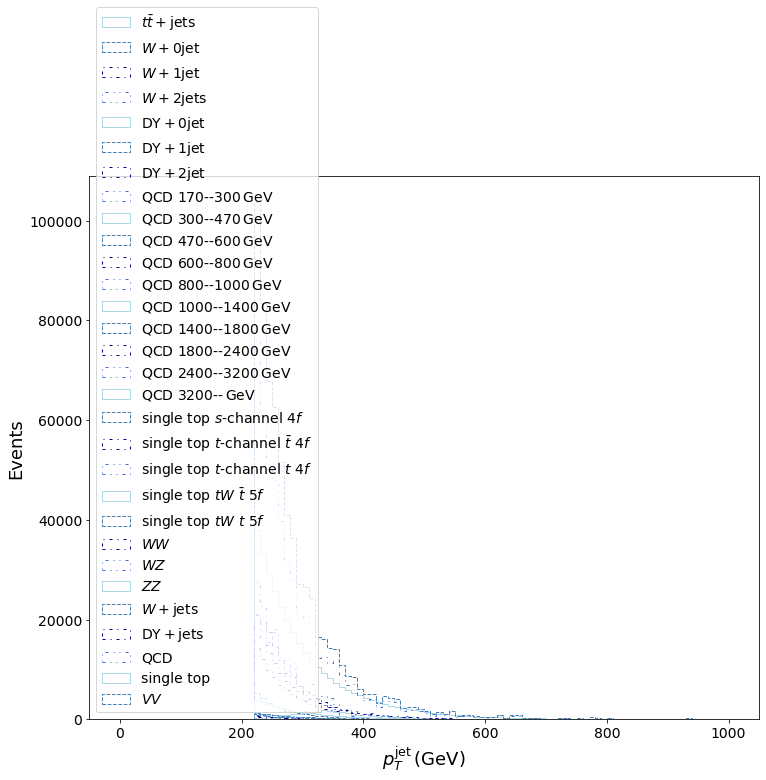

In [18]:
fig = plt.figure( figsize=(12,10) )

variation__ = "_nom"
var_str__ = {}
var_str__[ "_nom" ] = "_nom"
var_weights__ = "nom"

colors_ = [ "lightblue", "steelblue", "darkblue", "royalblue" ]

linestyles_ = [ "solid", "dashed", (0, (3, 5, 1, 5)), (0, (3, 5, 1, 5, 1, 5)) ]

range_ = (0., 1000.) 
bins_ = 100

for idx__, label__ in enumerate( labels_MC ):
    if df_selected_events_MC[ label__ ][ variation__ ].shape[0] > 0:
        plt.hist( df_selected_events_MC[ label__ ][ variation__ ][ "jet0_pt" + var_str__[ "_nom" ] ], weights=weights_events_MC[ label__ ][ var_weights__ ][ variation__ ],
                  histtype='step', color=colors_[ idx__ % len( colors_ ) ], linestyle=linestyles_[ idx__ % len( linestyles_ ) ], label=labels_samples[ label__ ], range=range_, bins=bins_ )

plt.xlabel( r"$ p^{\rm{jet}}_T \,\rm{(GeV)} $", fontsize=18 )
plt.ylabel( "Events", fontsize=18 )
plt.legend( loc='best', fontsize=14 )

### Data

In [19]:
labels_data = []
fileNames_data = {}
if data_sample == '2017':
    if lepton_type == 'muon':
        labels_data = [ ]
        fileNames_data = {
            
        }
    elif lepton_type == 'electron':
        labels_data = [ ]
        fileNames_data = {
            
        }
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_data = [
            "data-2018-muon-2018A",
            "data-2018-muon-2018B",
            "data-2018-muon-2018C",
            "data-2018-muon-2018D"
        ]
        fileNames_data = {
            "data-2018-muon-2018A": "data-store-data-2018-muon-2018A.h5",
            "data-2018-muon-2018B": "data-store-data-2018-muon-2018B.h5",
            "data-2018-muon-2018C": "data-store-data-2018-muon-2018C.h5",
            "data-2018-muon-2018D": "data-store-data-2018-muon-2018D.h5"
        }
    elif lepton_type == 'electron':
        labels_data = [
            "data-2018-electron-2018A",
            "data-2018-electron-2018B",
            "data-2018-electron-2018C",
            "data-2018-electron-2018D"
        ]
        fileNames_data = {
            "data-2018-electron-2018A": "data-store-data-2018-electron-2018A.h5",
            "data-2018-electron-2018B": "data-store-data-2018-electron-2018B.h5",
            "data-2018-electron-2018C": "data-store-data-2018-electron-2018C.h5",
            "data-2018-electron-2018D": "data-store-data-2018-electron-2018D.h5"
        }

base_path_ = 'output_events'
for label_ in fileNames_data:
    fileNames_data[ label_ ] = "{}/{}".format( base_path_, fileNames_data[ label_ ] )
print ( fileNames_data )

df_counts_data = None
df_events_data = None

df_counts_data_list_ = []
df_events_data_list_ = []
for label__ in labels_data:
    print ( label__ )
    file_path_ = fileNames_data[ label__ ]
    print ( file_path_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )
        
        df_counts_data__ = store_[ "counts" ]
        df_events_data__ = store_[ "events" ]
        df_counts_data_list_.append( df_counts_data__ )
        df_events_data_list_.append( df_events_data__ )

df_counts_data = df_counts_data_list_[0]
for idx_ in range( 1, len( df_counts_data_list_ ) ):
    df_counts_data = df_counts_data.add( df_counts_data_list_[ idx_ ] )

df_events_data = pd.concat( df_events_data_list_ )

{'data-2018-electron-2018A': 'output_events/data-store-data-2018-electron-2018A.h5', 'data-2018-electron-2018B': 'output_events/data-store-data-2018-electron-2018B.h5', 'data-2018-electron-2018C': 'output_events/data-store-data-2018-electron-2018C.h5', 'data-2018-electron-2018D': 'output_events/data-store-data-2018-electron-2018D.h5'}
data-2018-electron-2018A
output_events/data-store-data-2018-electron-2018A.h5
['/counts', '/events']
data-2018-electron-2018B
output_events/data-store-data-2018-electron-2018B.h5
['/counts', '/events']
data-2018-electron-2018C
output_events/data-store-data-2018-electron-2018C.h5
['/counts', '/events']
data-2018-electron-2018D
output_events/data-store-data-2018-electron-2018D.h5
['/counts', '/events']


In [20]:
df_counts_data

All           2235351
Jet           2235351
Electron      2178460
check_none    2178460
dtype: int64

In [21]:
df_events_data

,run,lumiblock,event,crossingAngle,betaStar,instLumi,jet0_pt,jet0_eta,jet0_phi,jet0_energy,...,WLeptonicPy_nom,WLeptonicPz_nom,WLeptonicE_nom,WLeptonicM_nom,WW_energy_nom,WW_pz_nom,MWW_nom,YWW_nom,xiCMS_45_nom,xiCMS_56_nom
0,315420,569,416382944,150.0,0.3,7.335082,259.488129,1.393797,0.511058,560.400757,...,-173.167618,154.407349,293.384735,80.379959,853.785522,645.098511,553.474976,0.985820,0.114026,0.014780
1,315420,569,415859968,150.0,0.3,7.335082,608.162476,1.434174,1.011866,1361.746460,...,-286.668549,456.913269,586.600403,200.959259,1948.346924,1660.426025,970.944275,1.264219,0.273844,0.018394
2,315420,569,415994624,150.0,0.3,7.335082,287.280121,2.372029,0.063373,1555.964600,...,-77.997559,101.822571,199.978180,93.293022,1755.942749,1628.117188,633.877930,1.638083,0.258315,0.007835
3,315420,569,416269728,150.0,0.3,7.335082,225.901459,-1.468740,1.415144,521.622437,...,-238.624542,-99.660568,270.890686,80.379997,792.513123,-564.288025,555.539124,-0.891276,0.016234,0.103047
4,315420,569,415822240,150.0,0.3,7.335082,266.486969,0.693158,1.316224,336.876373,...,-168.053711,-473.949890,509.635437,80.378204,846.511841,-274.081116,794.458008,-0.335861,0.043253,0.085419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182235,324980,86,94853360,160.0,0.3,17.818436,349.213898,0.084602,-2.582409,363.411011,...,175.628555,-80.162270,329.585968,86.951523,692.996948,-50.582657,689.714294,-0.073121,0.047522,0.055304
182236,324980,86,94336240,160.0,0.3,17.818436,286.685760,1.993431,-0.794014,1074.636108,...,130.419098,167.906540,238.204437,92.098152,1312.840576,1200.613281,505.348755,1.554443,0.191696,0.006987
182237,324980,86,93585120,160.0,0.3,17.818436,225.636246,0.124180,-2.764906,243.440125,...,85.728249,333.911255,424.329163,80.379761,667.769287,362.002838,560.605286,0.607136,0.077387,0.021694
182238,324980,86,95391104,160.0,0.3,17.818436,592.791138,-1.607940,1.601408,1543.989380,...,-678.974060,-223.896484,719.754883,80.380661,2263.744141,-1644.287720,1553.502686,-0.920973,0.046930,0.299897


### Select events

In [22]:
df_events_data__, selection_keys_, selections_ = select_events( df_events_data, lepton_type )
df_events_data = df_events_data__
print ( df_events_data.shape[0] )
print ( selection_keys_ )
print ( selections_ )

1559995
['All', 'Electron', 'Jet']
{'All': 2178460, 'Electron': 2177398, 'Jet': 1559995}


### Plot Data/MC

In [23]:
labels_MC_plot = []
if data_sample == '2017':
    if lepton_type == 'muon':
        labels_MC_plot = [ ]
    elif lepton_type == 'electron':
        labels_MC_plot = [ ]
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_MC_plot = [ "Bkg-2018-muon-WJetsToLNu", "Bkg-2018-muon-DYJetsToLL", "Bkg-2018-muon-TTJets", "Bkg-2018-muon-QCD", "Bkg-2018-muon-ST", "Bkg-2018-muon-VV" ]
#         labels_MC_plot = [ "Bkg-2018-muon-TTJets", "Bkg-2018-muon-WJetsToLNu", "Bkg-2018-muon-DYJetsToLL", "Bkg-2018-muon-VV" ]
    elif lepton_type == 'electron':
        labels_MC_plot = [ "Bkg-2018-electron-WJetsToLNu", "Bkg-2018-electron-DYJetsToLL", "Bkg-2018-electron-TTJets", "Bkg-2018-electron-QCD", "Bkg-2018-electron-ST", "Bkg-2018-electron-VV" ]
        #labels_MC_plot = [ "Bkg-2018-electron-TTJets", "Bkg-2018-electron-WJetsToLNu", "Bkg-2018-electron-DYJetsToLL", "Bkg-2018-electron-QCD", "Bkg-2018-electron-ST", "Bkg-2018-electron-VV" ]

In [24]:
var_str__ = {}
var_str__[ "_nom" ] = "_nom"
var_str__[ "_jes_up" ] = "_jes_up"
var_str__[ "_jes_dw" ] = "_jes_dw"
var_str__[ "_jer_up" ] = "_jer_up"
var_str__[ "_jer_dw" ] = "_jer_dw"

def plot_MC_data( variable, variation, variation_weights, bins, range, xlabel ):

    variable__ = variable
    variation__ = variation
    variation_weights__ = variation_weights
    bins__ = bins
    range__ = range
    xlabel__ = xlabel
    
    fig = plt.figure( figsize=(12,10) )

    #colors_ = [ "lightblue", "steelblue", "darkblue", "royalblue" ]
    colors_ = [ "blue", "dimgray", "orange", "red", "cyan", "lime" ]

    linestyles_ = [ "solid", "dashed", (0, (3, 5, 1, 5)), (0, (3, 5, 1, 5, 1, 5)) ]

    arr_data_MC_ = []
    weights_data_MC_ = []
    colors_MC_ = []
    labels_MC_ = []
    for idx__, label__ in enumerate( labels_MC_plot ):
        if df_selected_events_MC[ label__ ][ variation__ ].shape[0] > 0:
            arr_data_MC_.append( df_selected_events_MC[ label__ ][ variation__ ][ variable__ + var_str__[ variation__ ] ] )
            weights_data_MC_.append( weights_events_MC[ label__ ][ var_weights__ ][ variation__ ] )
            colors_MC_.append( colors_[ idx__ % len( colors_ ) ] )
            labels_MC_.append( labels_samples[ label__ ] )

    # plt.hist( df_selected_events_MC[ label__ ][ variation__ ][ variable__ + var_str__[ "_nom" ] ], weights=weights_events_MC[ label__ ][ var_weights__ ][ variation__ ],
    #           stacked=True, color=colors_[ idx__ % len( colors_ ) ], linestyle=linestyles_[ idx__ % len( linestyles_ ) ], label=labels_samples[ label__ ], range=range_, bins=bins_ )
    plt.hist( arr_data_MC_, weights=weights_data_MC_,
              stacked=True, color=colors_MC_, label=labels_MC_, range=range_, bins=bins_ )

    counts_bins_data_, bin_edges_ = np.histogram( df_events_data[ variable__ + var_str__[ variation__ ] ], range=range_, bins=bins_ )
    errors_bins_data_ = np.sqrt( counts_bins_data_ )
    bin_centres_ = ( bin_edges_[:-1] + bin_edges_[1:] ) / 2.
    plt.errorbar( bin_centres_, counts_bins_data_, yerr=errors_bins_data_, fmt='o', color='black', label=r"Data" )

    plt.xlabel( xlabel__, fontsize=18 )
    plt.ylabel( "Events", fontsize=18 )
    plt.legend( loc='best', fontsize=14 )
    

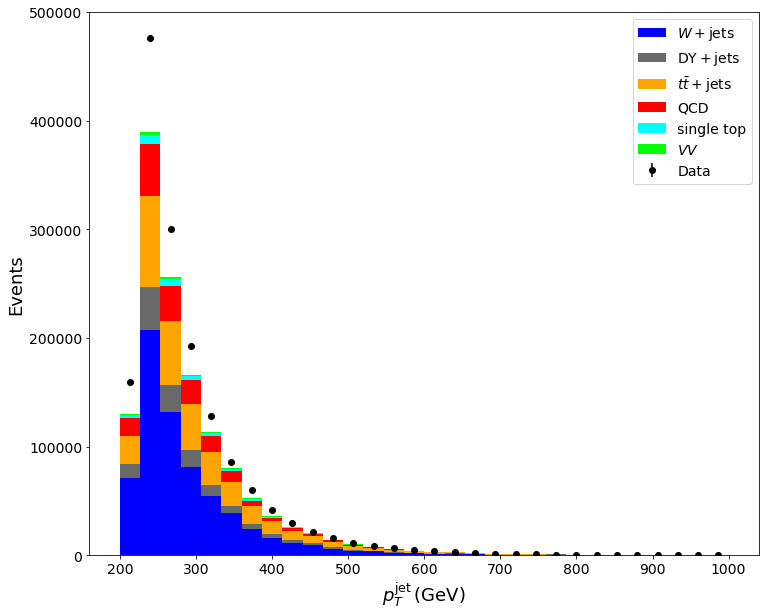

In [25]:
variation__ = "_nom"
variation_weights__ = "nom"
variable__ = "jet0_pt"
range_ = (200., 1000.) 
bins_ = 30
xlabel_ = r"$ p^{\rm{jet}}_T \,\rm{(GeV)} $"
plot_MC_data( variable=variable__, variation=variation__, variation_weights=variation_weights__, bins=bins_, range=range_, xlabel=xlabel_ )

if save_figures:
    if lepton_type == "muon":
        plt.savefig( "plots/jet_PT_muon_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/jet_PT_muon_2018.png", bbox_inches='tight' )
    if lepton_type == "electron":
        plt.savefig( "plots/jet_PT_electron_2018.pdf", bbox_inches='tight' )
        plt.savefig( "plots/jet_PT_electron_2018.png", bbox_inches='tight' )

In [26]:
var_str__ = {}
var_str__[ "_nom" ] = "_nom"
var_str__[ "_jes_up" ] = "_jes_up"
var_str__[ "_jes_dw" ] = "_jes_dw"
var_str__[ "_jer_up" ] = "_jer_up"
var_str__[ "_jer_dw" ] = "_jer_dw"

def get_MC_histogram_label( label, variable, variation, variation_weights, bins, range ):
       
    df_events__ = df_selected_events_MC[ label ][ variation ][ variable + var_str__[ variation ] ]
    weights_events__ = weights_events_MC[ label ][ variation_weights ][ variation ]
    weights2_events__ = ( weights_events__ ** 2 )
        
    sum_weights_bins__, bin_edges__ = np.histogram( df_events__, weights=weights_events__, bins=bins, range=range )
    sum_weights2_bins__, __ = np.histogram( df_events__, weights=weights2_events__, bins=bins, range=range )
        
    return ( sum_weights_bins__, sum_weights2_bins__, bin_edges__ )
        
def get_MC_histogram_all( variable, variation, variation_weights, bins, range ):
    
    sum_weights_bins_all_ = None
    sum_weights2_bins_all_ = None
    bin_edges_ = None
    for label__ in labels_MC_plot:
        sum_weights_bins__, sum_weights2_bins__, bin_edges__ = get_MC_histogram_label( label__, variable, variation, variation_weights, bins, range )
        if sum_weights_bins_all_ is None:
            sum_weights_bins_all_ = sum_weights_bins__
            sum_weights2_bins_all_ = sum_weights2_bins__
            bin_edges_ = bin_edges__
        else:
            sum_weights_bins_all_ = ( sum_weights_bins_all_ + sum_weights_bins__ )
            sum_weights2_bins_all_ = ( sum_weights2_bins_all_ + sum_weights2_bins__ )
        
    return ( sum_weights_bins_all_, sum_weights2_bins_all_, bin_edges_ )

def get_uncertainties_variations( variable, variations, scale_variation, bins, range ):
    
    max__ = None
    min__ = None
    
    for idx_, variation__ in enumerate( variations ):
        __variation__ = variation__ if not scale_variation else "_nom"
        __var_str__ = var_str__[ __variation__ ] if not scale_variation else "_nom"
        __variation_weights__ = variation__ if scale_variation else "nom"
        if variation__ != "_nom" and variation__ != "nom":
            print ( __variation__ )
            print ( __var_str__ )
            print ( __variation_weights__ )
                
            sum_weights__, sum_weights2__, bin_edges__ = get_MC_histogram_all( variable, __variation__, __variation_weights__, bins, range )
                
            if max__ is None: max__ = sum_weights__.copy()
            if min__ is None: min__ = sum_weights__.copy()
            msk__ = ( sum_weights__ > max__ )
            max__[ msk__ ] = sum_weights__[ msk__ ]
            msk__ = ( sum_weights__ < min__ )
            min__[ msk__ ] = sum_weights__[ msk__ ]
                
    return ( max__, min__ )    

def get_total_uncertainty( variable, bins, range ):

    lepton_type__ = lepton_type
    variable__ = variable
    bins__ = bins
    range__ = range
    
    max_variations__ = {}
    min_variations__ = {}
    
    variations__ = [ "_nom", "_jes_up", "_jes_dw" ]
    weights_max__, weights_min__ = get_uncertainties_variations( variable=variable__, variations=variations__, scale_variation=False, bins=bins__, range=range__ )
    max_variations__[ "jes" ] = weights_max__
    min_variations__[ "jes" ] = weights_min__
    
    variations__ = [ "_nom", "_jer_up", "_jer_dw" ]
    weights_max__, weights_min__ = get_uncertainties_variations( variable=variable__, variations=variations__, scale_variation=False, bins=bins__, range=range__ )
    max_variations__[ "jer" ] = weights_max__
    min_variations__[ "jer" ] = weights_min__
    
    variations_weights__ = []
    if lepton_type__ == 'muon':
        variations_weights__ = [ "nom", "sf_muon_id_up", "sf_muon_id_dw" ]
    elif lepton_type__ == 'electron':
        variations_weights__ = [ "nom", "sf_electron_id_up", "sf_electron_id_dw" ]
    weights_max__, weights_min__ = get_uncertainties_variations( variable=variable__, variations=variations_weights__, scale_variation=True, bins=bins__, range=range__ )
    
    variation_name_lepton_id__ = ""
    if lepton_type__ == 'muon': variation_name_lepton_id__ =  "sf_muon_id"
    elif lepton_type__ == 'electron': variation_name_lepton_id__ =  "sf_electron_id"
    max_variations__[ variation_name_lepton_id__ ] = weights_max__
    min_variations__[ variation_name_lepton_id__ ] = weights_min__
    
    sum_weights__, sum_weights2__, bin_edges__ = get_MC_histogram_all( variable=variable__, variation="_nom", variation_weights="nom", bins=bins__, range=range__ )
    error_bins_stat__ = np.sqrt( sum_weights2__ )
                             
    __max__ = ( sum_weights__ +
                np.sqrt(
                    ( max_variations__[ "jes" ] - sum_weights__ ) ** 2 +
                    ( max_variations__[ "jer" ] - sum_weights__ ) ** 2 +
                    ( max_variations__[ variation_name_lepton_id__ ] - sum_weights__ ) ** 2 +
                    sum_weights2__ ) )
    __min__ = ( sum_weights__ -
                np.sqrt(
                    ( sum_weights__ - min_variations__[ "jes" ] ) ** 2 +
                    ( sum_weights__ - min_variations__[ "jer" ] ) ** 2 +
                    ( sum_weights__ - min_variations__[ variation_name_lepton_id__ ] ) ** 2 +
                    sum_weights2__ ) )
                                
    return ( __max__, __min__ )
    
def plot_band_hist( ax, bin_edges, weights_min, weights_max, color, label ):
    bin_centres_ = ( bin_edges[:-1] + bin_edges[1:] ) / 2.
    
    ax.hist( bin_centres_, bottom=weights_min, weights=( weights_max - weights_min ), bins=bin_edges, color=color, label=label )


In [27]:
def plot_MC_data_stat( variable, variation, variation_weights, bins, range, xlabel ):

    variable__ = variable
    variation__ = variation
    variation_weights__ = variation_weights
    bins__ = bins
    range__ = range
    xlabel__ = xlabel

    sum_weights_bins_all_, sum_weights2_bins_all_, bin_edges_ = get_MC_histogram_all( variable=variable__, variation=variation__, variation_weights=variation_weights__, bins=bins_, range=range_ )
    error_bins_stat_ = np.sqrt( sum_weights2_bins_all_ )
    sum_weights_bins_all_min_stat_ = ( sum_weights_bins_all_ - error_bins_stat_ )
    sum_weights_bins_all_max_stat_ = ( sum_weights_bins_all_ + error_bins_stat_ )

    bin_centres_ = ( bin_edges_[:-1] + bin_edges_[1:] ) / 2.

    fig = plt.figure( figsize=(12,10) )

    plt.hist( bin_centres_, weights=sum_weights_bins_all_, bins=bin_edges_, color='darkblue', histtype='step', label=r"MC" )
    # plt.hist( bin_centres_, bottom=sum_weights_bins_all_min_stat_, weights=( sum_weights_bins_all_max_stat_ - sum_weights_bins_all_min_stat_ ), bins=bin_edges_, color='lightgray', label=r"stat" )
    plot_band_hist( plt.gca(), bin_edges=bin_edges_, weights_min=sum_weights_bins_all_min_stat_, weights_max=sum_weights_bins_all_max_stat_, color='lightgray', label=r"stat" )

    counts_bins_data_, bin_edges_ = np.histogram( df_events_data[ variable__ + var_str__[ variation__ ] ], range=range_, bins=bins_ )
    errors_bins_data_ = np.sqrt( counts_bins_data_ )
    plt.errorbar( bin_centres_, counts_bins_data_, yerr=errors_bins_data_, fmt='o', color='black', label=r"Data" )

    plt.xlabel( xlabel__, fontsize=18 )
    plt.ylabel( "Events", fontsize=18 )
    plt.legend( loc='best', fontsize=14 )
    

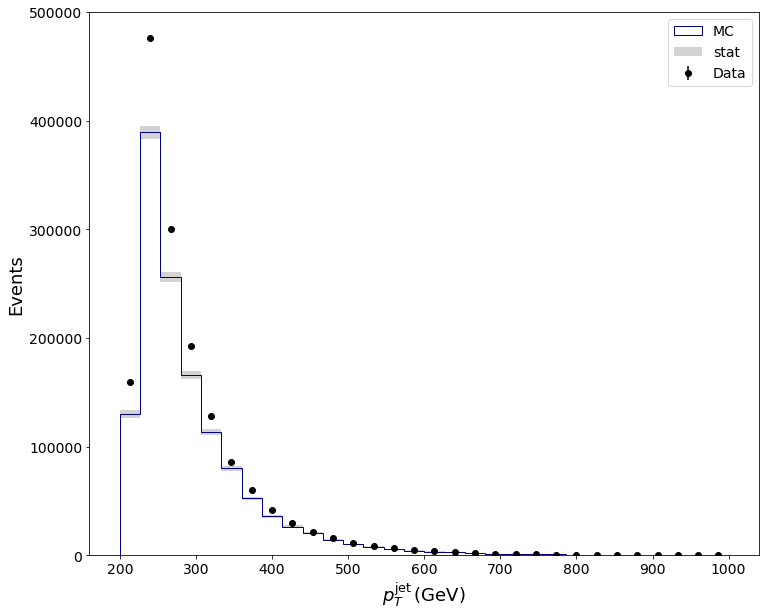

In [28]:
variation__ = "_nom"
variation_weights__ = "nom"
variable__ = "jet0_pt"
range_ = (200., 1000.) 
bins_ = 30
xlabel_ = r"$ p^{\rm{jet}}_T \,\rm{(GeV)} $"
plot_MC_data_stat( variable=variable__, variation=variation__, variation_weights=variation_weights__, bins=bins_, range=range_, xlabel=xlabel_ )

In [29]:
def plot_MC_data_total_uncertainty( variable, bins, range, xlabel ):

    variable__ = variable
    bins__ = bins
    range__ = range
    xlabel__ = xlabel
    
    sum_weights_bins_all_, sum_weights2_bins_all_, bin_edges_ = get_MC_histogram_all( variable=variable__, variation="_nom", variation_weights="nom", bins=bins__, range=range__ )
    error_bins_stat_ = np.sqrt( sum_weights2_bins_all_ )
    sum_weights_bins_all_min_stat_ = ( sum_weights_bins_all_ - error_bins_stat_ )
    sum_weights_bins_all_max_stat_ = ( sum_weights_bins_all_ + error_bins_stat_ )

    bin_centres_ = ( bin_edges_[:-1] + bin_edges_[1:] ) / 2.

    weights_max_, weights_min_ = get_total_uncertainty( variable=variable__, bins=bins_, range=range_ )

    fig = plt.figure( figsize=(12,10) )

    plt.hist( bin_centres_, weights=sum_weights_bins_all_, bins=bin_edges_, color='darkblue', histtype='step', label=r"MC" )
    plot_band_hist( plt.gca(), bin_edges=bin_edges_, weights_min=weights_min_, weights_max=weights_max_, color='slategray', label=r"total unc." )
    plot_band_hist( plt.gca(), bin_edges=bin_edges_, weights_min=sum_weights_bins_all_min_stat_, weights_max=sum_weights_bins_all_max_stat_, color='lightgray', label=r"stat" )

    counts_bins_data_, bin_edges_ = np.histogram( df_events_data[ variable__ + var_str__[ variation__ ] ], range=range_, bins=bins_ )
    errors_bins_data_ = np.sqrt( counts_bins_data_ )
    plt.errorbar( bin_centres_, counts_bins_data_, yerr=errors_bins_data_, fmt='o', color='black', label=r"Data" )

    plt.xlabel( xlabel__, fontsize=18 )
    plt.ylabel( "Events", fontsize=18 )
    plt.legend( loc='best', fontsize=14 )
    

_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
_nom
_nom
sf_electron_id_up
_nom
_nom
sf_electron_id_dw


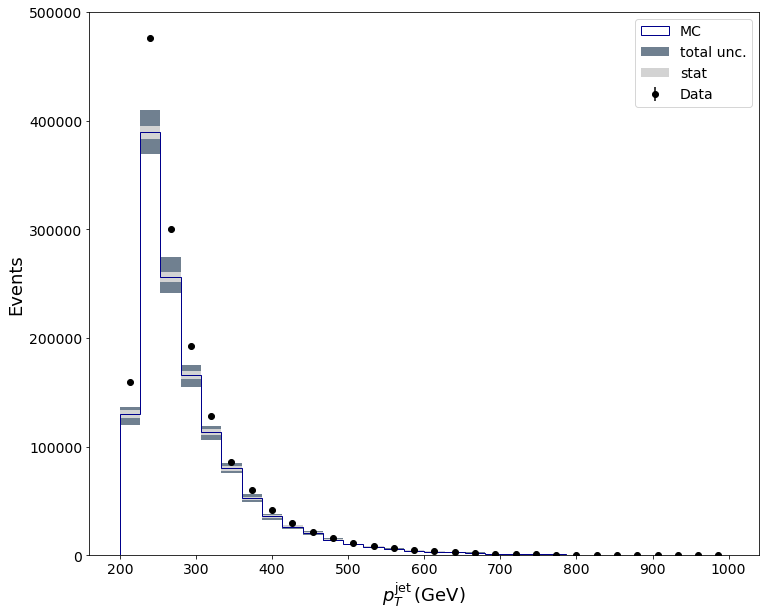

In [30]:
variable__ = "jet0_pt"
range_ = (200., 1000.) 
bins_ = 30
xlabel_ = r"$ p^{\rm{jet}}_T \,\rm{(GeV)} $"
plot_MC_data_total_uncertainty( variable=variable__, bins=bins_, range=range_, xlabel=xlabel_ )

if save_figures:
    if lepton_type == "muon":
        plt.savefig( "plots/jet_PT_muon_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/jet_PT_muon_2018_with_unc.png", bbox_inches='tight' )
    if lepton_type == "electron":
        plt.savefig( "plots/jet_PT_electron_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/jet_PT_electron_2018_with_unc.png", bbox_inches='tight' )

_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
_nom
_nom
sf_electron_id_up
_nom
_nom
sf_electron_id_dw


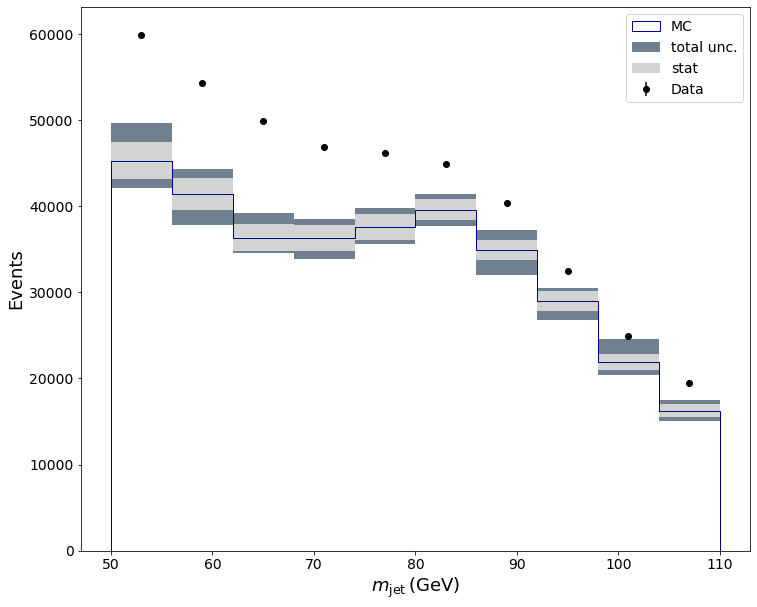

In [31]:
variable__ = "jet0_corrmass"
range_ = (50., 110.) 
bins_ = 10
xlabel_ = r"$ m_{\rm{jet}} \,\rm{(GeV)} $"
plot_MC_data_total_uncertainty( variable=variable__, bins=bins_, range=range_, xlabel=xlabel_ )

if save_figures:
    if lepton_type == "muon":
        plt.savefig( "plots/jet_mass_muon_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/jet_mass_muon_2018_with_unc.png", bbox_inches='tight' )
    if lepton_type == "electron":
        plt.savefig( "plots/jet_mass_electron_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/jet_mass_electron_2018_with_unc.png", bbox_inches='tight' )

_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
_nom
_nom
sf_electron_id_up
_nom
_nom
sf_electron_id_dw


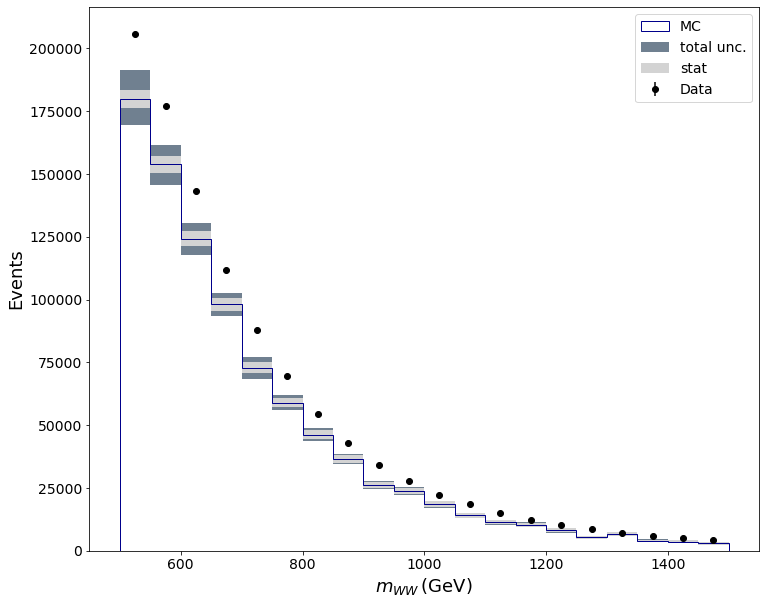

In [32]:
variable__ = "MWW"
range_ = (500., 1500.) 
bins_ = 20
xlabel_ = r"$ m_{WW} \,\rm{(GeV)} $"
plot_MC_data_total_uncertainty( variable=variable__, bins=bins_, range=range_, xlabel=xlabel_ )

if save_figures:
    if lepton_type == "muon":
        plt.savefig( "plots/WW_mass_muon_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/WW_mass_muon_2018_with_unc.png", bbox_inches='tight' )
    if lepton_type == "electron":
        plt.savefig( "plots/WW_mass_electron_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/WW_mass_electron_2018_with_unc.png", bbox_inches='tight' )

In [33]:
variable__ = "jet0_eta"
range_ = (200., 1000.) 
bins_ = 30
xlabel_ = r"$ {\eta}^{\rm{jet}} \ $"
plot_MC_data_total_uncertainty( variable=variable__, bins=bins_, range=range_, xlabel=xlabel_ )

if save_figures:
    if lepton_type == "muon":
        plt.savefig( "plots/jet_eta_muon_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/jet_eta_muon_2018_with_unc.png", bbox_inches='tight' )
    if lepton_type == "electron":
        plt.savefig( "plots/jet_eta_electron_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/jet_eta_electron_2018_with_unc.png", bbox_inches='tight' )

KeyError: 'jet0_eta_nom'

In [ ]:
variable__ = "jet0_phi"
range_ = (200., 1000.) 
bins_ = 30
xlabel_ = r"$ {\Phi}^{\rm{jet}} \ $"
plot_MC_data_total_uncertainty( variable=variable__, bins=bins_, range=range_, xlabel=xlabel_ )

if save_figures:
    if lepton_type == "muon":
        plt.savefig( "plots/jet_phi_muon_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/jet_phi_muon_2018_with_unc.png", bbox_inches='tight' )
    if lepton_type == "electron":
        plt.savefig( "plots/jet_phi_electron_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/jet_phi_electron_2018_with_unc.png", bbox_inches='tight' )

In [ ]:
variable__ = lepton_var_pt_
range_ = (200., 1000.) 
bins_ = 30
xlabel_ = r"$ p^{\rm{lep}}_T \,\rm{(GeV)} $"
plot_MC_data_total_uncertainty( variable=variable__, bins=bins_, range=range_, xlabel=xlabel_ )

if save_figures:
    if lepton_type == "muon":
        plt.savefig( "plots/muon_PT_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/muon_PT_2018_with_unc.png", bbox_inches='tight' )
    if lepton_type == "electron":
        plt.savefig( "plots/electron_PT_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/electron_PT_2018_with_unc.png", bbox_inches='tight' )

In [ ]:
variable__ = lepton_var_eta_
range_ = (200., 1000.) 
bins_ = 30
xlabel_ = r"$ {\eta}^{\rm{lep}} \ $"
plot_MC_data_total_uncertainty( variable=variable__, bins=bins_, range=range_, xlabel=xlabel_ )

if save_figures:
    if lepton_type == "muon":
        plt.savefig( "plots/muon_eta_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/muon_eta_2018_with_unc.png", bbox_inches='tight' )
    if lepton_type == "electron":
        plt.savefig( "plots/electron_eta_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/electron_eta_2018_with_unc.png", bbox_inches='tight' )

In [ ]:
variable__ = lepton_var_phi_
range_ = (200., 1000.) 
bins_ = 30
xlabel_ = r"$ {\Phi}^{\rm{lep}} \ $"
plot_MC_data_total_uncertainty( variable=variable__, bins=bins_, range=range_, xlabel=xlabel_ )

if save_figures:
    if lepton_type == "muon":
        plt.savefig( "plots/muon_phi_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/muon_phi_2018_with_unc.png", bbox_inches='tight' )
    if lepton_type == "electron":
        plt.savefig( "plots/electron_phi_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/electron_phi_2018_with_unc.png", bbox_inches='tight' )

In [ ]:
variable__ = deltaR_jet_lep_
range_ = (200., 1000.) 
bins_ = 30
xlabel_ = r"$ {\Delta}R^{\rm{lep,jet}} \ $"
plot_MC_data_total_uncertainty( variable=variable__, bins=bins_, range=range_, xlabel=xlabel_ )

if save_figures:
    if lepton_type == "muon":
        plt.savefig( "plots/muon_deltaR_jetlep_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/muon_deltaR_jetlep_2018_with_unc.png", bbox_inches='tight' )
    if lepton_type == "electron":
        plt.savefig( "plots/electron_deltaR_jetlep_2018_with_unc.pdf", bbox_inches='tight' )
        plt.savefig( "plots/electron_deltaR_jetlep_2018_with_unc.png", bbox_inches='tight' )